<a href="https://colab.research.google.com/github/prankster972/ml_python/blob/main/laba2/lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание на лабораторную работу №2. Pandas и основы python
## Общее задание
1. Сгенерировать с использованием библиотеки pandas csv файл, содержащий 3 столбца: $x_1$, $x_2$, $y$ (> 400 строк, генерация с использованием функции linspace). Вид функции определяется вариантом (диапазон выбирается студентом).
2. Открыть файл с использованием библиотеки pandas и построить графики: $y(x_1)$ ($x_2$ - константа), $y(x_2)$  ($x_1$ - константа). Графики необходимо построить с использованием matplotlib (для функции y отобразить точки на графике).
3. Вывести для каждого столбца $(x_1, x_2, y)$: среднее, минимальное и максимальное значения.
4. Сохранить в новый csv файл те строки, для которых выполняется условие: $x_1$ меньше среднее $x_1$ или $x_2$ меньше среднее $x_2$
5. С использованием mplot3D построить 3D график функции $y(x_1, x_2)$ в отдельном окне.

## Варианты
1. $y = sin(x_1 + x_2)$
2. $y = cos(x_1 + x_2)$
3. $y = tan(x_1 + x_2) * sin(x_1)$
4. $y = 2 * x_1^2 + 3x_2^2$
5. $y = 5 * log(x_1) * log(2 * x_2)$
6. $y = 5 * log(x_1) * x_2^2$
7. $y = cos(x_1) * x_2^3$
8. $y = \frac{3}{(2 + e^{-2x})}$
9. $y = cos(x_1 + x_2) * x_2 ^ 2$
10. $y = \frac{x_2}{(1 + e^{-x_1})}$
11. $y = \frac{3 * x_1}{(1 - e^{-x_2})}$
12. $y = 0.01 * tan(x_1) * x_2^2$
13. $y = x_1^6 + x_2^2 + x_1^3 + 4x_2 + 5$
14. $y = cos(x_1) * x_2^3$
15. $y = tan(x_1) * ctg(x_2)$
16. $y = \frac{sin(x_1)}{(1 + e^{-2x_2})}$
17. $y = \frac{cos(x_1)}{(1 + e^{-2x_2})}$
18. $y = \frac{tan(x_1)}{(3 + e^{-2x_2})}$
19. $y = \frac{ctg(x_1)}{(2 + e^{-2x_2})}$
20. $y = \frac{x_1^2}{(1 + e^{-2x_2})}$


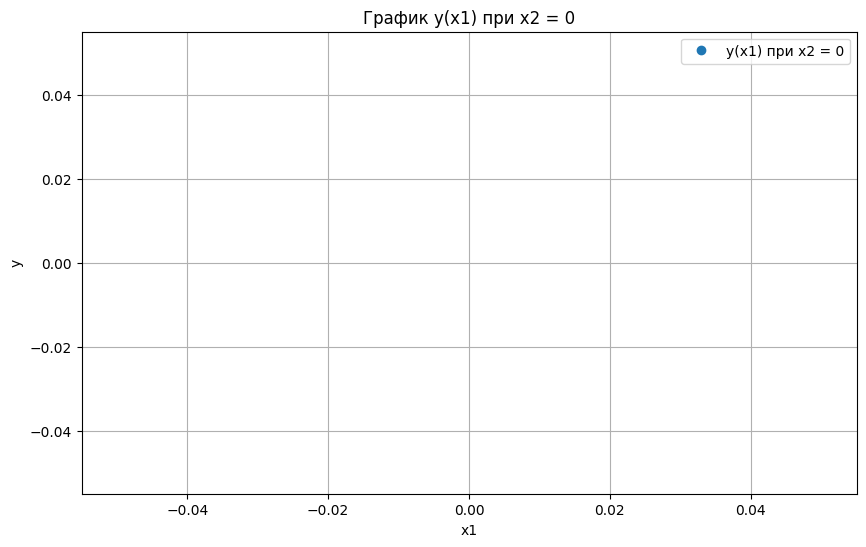

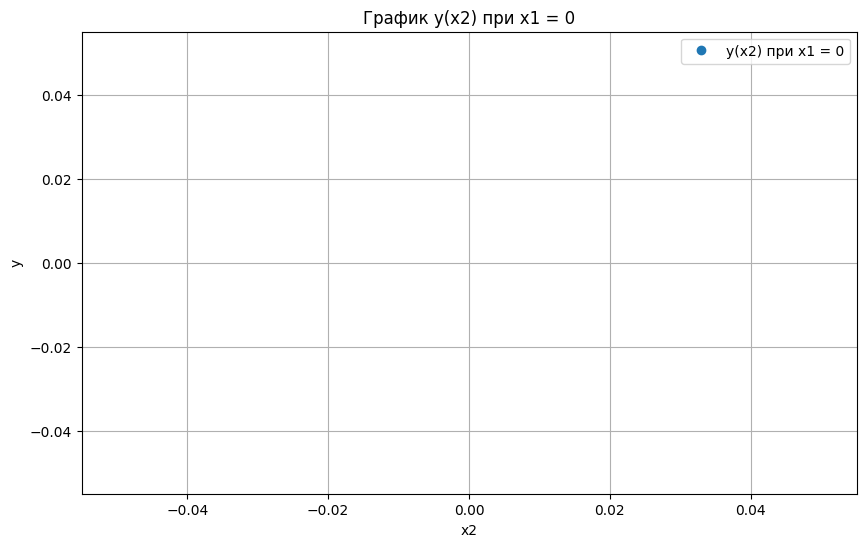

Статистика для столбцов:
x1: Среднее = -3.255991032347083e-16, Минимум = -10.0, Максимум = 10.0
x2: Среднее = 1.164153218269348e-16, Минимум = -5.0, Максимум = 5.0
y: Среднее = -4.997446012566797e-15, Минимум = -112.2260246098633, Максимум = 112.2260246098633


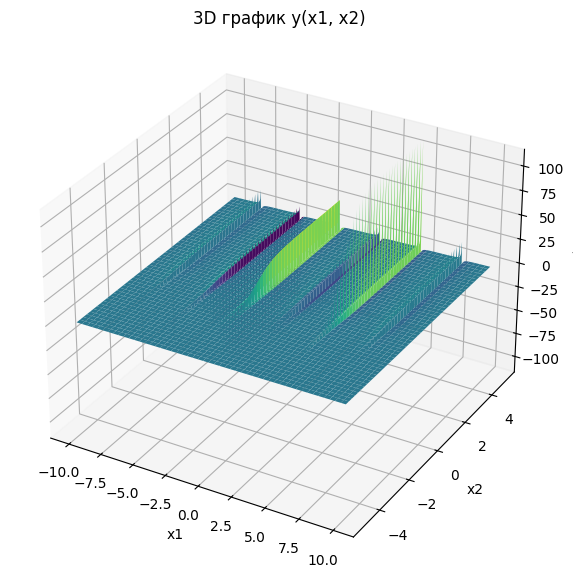

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Шаг 1: Генерация данных
x1 = np.linspace(-10, 10, 500)  # Генерация 500 точек для x1 в диапазоне от -10 до 10
x2 = np.linspace(-5, 5, 500)    # Генерация 500 точек для x2 в диапазоне от -5 до 5

# Функция y = tan(x1) / (3 + e^(-2 * x2))
y = np.tan(x1) / (3 + np.exp(-2 * x2))

# Создаем DataFrame
data = pd.DataFrame({
    'x1': np.tile(x1, len(x2)),  # Для каждого значения x2 будет свой набор x1
    'x2': np.repeat(x2, len(x1)), # Для каждого значения x1 будет свой набор x2
    'y': np.tile(np.tan(x1), len(x2)) / (3 + np.exp(-2 * np.repeat(x2, len(x1))))  # y по функции
})

# Сохраняем данные в CSV файл
data.to_csv('data.csv', index=False)

# Шаг 2: Открытие CSV файла с использованием pandas
data = pd.read_csv('data.csv')

# Строим графики y(x1) при фиксированном x2 = 0 и y(x2) при фиксированном x1 = 0

# График y(x1), при фиксированном x2 (пусть x2 = 0)
plt.figure(figsize=(10, 6))
plt.plot(data[data['x2'] == 0]['x1'], data[data['x2'] == 0]['y'], 'o', label="y(x1) при x2 = 0")
plt.xlabel('x1')
plt.ylabel('y')
plt.title('График y(x1) при x2 = 0')
plt.legend()
plt.grid(True)
plt.show()

# График y(x2), при фиксированном x1 (пусть x1 = 0)
plt.figure(figsize=(10, 6))
plt.plot(data[data['x1'] == 0]['x2'], data[data['x1'] == 0]['y'], 'o', label="y(x2) при x1 = 0")
plt.xlabel('x2')
plt.ylabel('y')
plt.title('График y(x2) при x1 = 0')
plt.legend()
plt.grid(True)
plt.show()

# Шаг 3: Среднее, минимальное и максимальное значение для каждого столбца
print("Статистика для столбцов:")
for column in ['x1', 'x2', 'y']:
    print(f"{column}: Среднее = {data[column].mean()}, Минимум = {data[column].min()}, Максимум = {data[column].max()}")

# Шаг 4: Сохранение строк с условием
mean_x1 = data['x1'].mean()
mean_x2 = data['x2'].mean()

filtered_data = data[(data['x1'] < mean_x1) | (data['x2'] < mean_x2)]

# Сохраняем отфильтрованные строки в новый CSV файл
filtered_data.to_csv('filtered_data.csv', index=False)

# Шаг 5: 3D график функции y(x1, x2)
X1, X2 = np.meshgrid(x1, x2)  # Создаем сетку для x1 и x2
Y = np.tan(X1) / (3 + np.exp(-2 * X2))  # Вычисляем значения функции для каждой точки сетки

# Строим 3D график
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, Y, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('3D график y(x1, x2)')

plt.show()
